In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
col_names = ['user_id','item_id','rating','timestamp']
data = pd.read_csv("C:/Users/asus/Desktop/movie.txt",sep ='\t' ,names = col_names)

In [3]:
data

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [4]:
data.columns

Index(['user_id', 'item_id', 'rating', 'timestamp'], dtype='object')

In [5]:
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
col2_names = ['item_id', 'title']
mov_title= pd.read_csv("C:/Users/asus/Desktop/movieTitle.txt", sep = ",", names =col2_names)

In [7]:
mov_title

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [8]:
dat = pd.merge(data,mov_title, on = "item_id") ## Merged the two datasets to have a better view os data

In [9]:
dat

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [10]:
unique_movies = dat.title.unique()

In [11]:
unique_movies

array(['Star Wars (1977)', 'Empire Strikes Back, The (1980)',
       'Gone with the Wind (1939)', ..., 'Girls Town (1996)',
       'Silence of the Palace, The (Saimt el Qusur) (1994)',
       'Dadetown (1995)'], dtype=object)

In [12]:
dat.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Exploratory Data Analysis
    1. To analyze ratings of movies
    2. To analyze users count of ratings for movies

In [13]:
dat.groupby('title')['rating'].mean().sort_values(ascending  = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

## Inference
1. Average rating of users for a particular movie
Here we can see movies having a average rating of '5' which have to be analyzed.
May be very less users have watched the movie. 

Lets Analyze by taking one of the movies having average rating of 5.0 and see how many users have watched

In [14]:
dat[dat['title']== 'Prefontaine (1997)']

,user_id,item_id,rating,timestamp,title
93875,87,1189,5,879877951,Prefontaine (1997)
93876,416,1189,5,893213917,Prefontaine (1997)
93877,532,1189,5,892521554,Prefontaine (1997)


In [15]:
dat[dat['title'] == 'Santa with Muscles (1996)']

,user_id,item_id,rating,timestamp,title
96170,279,1500,5,875306613,Santa with Muscles (1996)
96171,781,1500,5,879634096,Santa with Muscles (1996)


 
1. Movies having an average rating of 5.0 has been watched by less number of people

In [16]:
count_rating = dat.groupby('title')['rating'].count().sort_values(ascending = False)

In [17]:
count_rating.head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

## Analysis 
1. how many users having given rating to a particular movie 

In [18]:
## Average Rating for each movie

In [19]:
ratings = pd.DataFrame(dat.groupby('title')['rating'].mean())

In [20]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [28]:
ratings['count_of_ratings'] = pd.DataFrame(dat.groupby('title')['rating'].count())

In [29]:
ratings

,rating,count_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [26]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [ ]:
## plotting a histogram to see the count of ratings 

<AxesSubplot:>

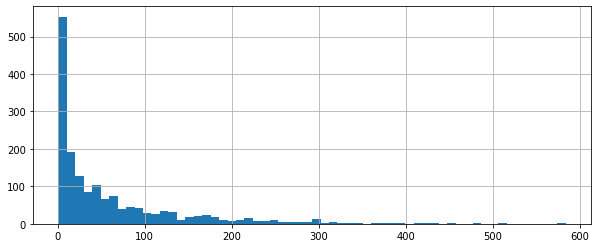

In [30]:
plt.figure(figsize=(10,4))
ratings['count_of_ratings'].hist(bins = 60)


1. Very less movies have higher count of ratings
2. Most of the movies are reviewed by 0-100 users

<AxesSubplot:>

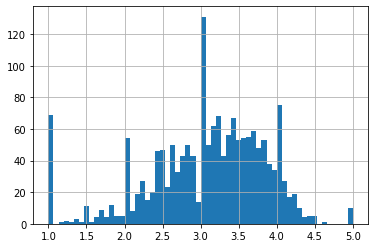

In [31]:
ratings['rating'].hist(bins = 60)

1. Most of the movies have ratings around 2.5 - 4 

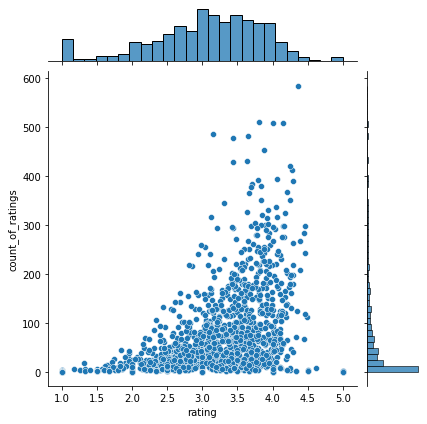

In [32]:
 sns.jointplot(x= 'rating', y='count_of_ratings', data = ratings)

1. The movies having ratings around 3.0 - 4.5 were reviewed by most of the users.


In [33]:
movie_mat = dat.pivot_table(index='user_id', columns = 'title', values = 'rating')
movie_mat.head()                                                   ## NaN - every user hasn't watched all the movies

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
ratings.sort_values('count_of_ratings', ascending = False).head(15)

,rating,count_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [36]:
## for one movie - star wars
starwars_user_rating = movie_mat['Star Wars (1977)']


In [37]:
starwars_user_rating

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [38]:
## find correlation with the pivot table
similar_starwars = movie_mat.corrwith(starwars_user_rating)

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [39]:
starwars_corr = pd.DataFrame(similar_starwars , columns  =['Correlation'])
starwars_corr.dropna(inplace = True) ## Movies Correlating with Star Wars
starwars_corr

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


1. The movie from the list having highest correlation will be recommended
2. As we discussed some of the movies were reviewed by ver less number of users, 
    So we will take only the movies reviewed by atleast 100 users 


In [40]:
starwars_corr.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0


In [41]:
starwars_corr = starwars_corr.join(ratings['count_of_ratings'])
starwars_corr.head(10)

,Correlation,count_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [42]:
starwars_corr[starwars_corr['count_of_ratings'] >100].sort_values('Correlation', ascending  = False).head(10)
## Considering movies which were reviewd by more than 100 users

,Correlation,count_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


## Lets check the movie Contact (1997) and we will try to give the recommendation

In [43]:
Contact_user_rating = movie_mat['Contact (1997)']

In [44]:
Contact_user_rating

user_id
0      NaN
1      5.0
2      3.0
3      2.0
4      5.0
      ... 
939    4.0
940    5.0
941    4.0
942    4.0
943    NaN
Name: Contact (1997), Length: 944, dtype: float64

In [45]:
similar_Contact = movie_mat.corrwith(Contact_user_rating)

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [46]:
Contact_corr = pd.DataFrame(similar_Contact , columns  =['Correlation'])
Contact_corr.dropna(inplace = True) ## Movies Correlating with Contact
Contact_corr

,Correlation
title,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031
...,...
Young Guns (1988),0.388839
Young Guns II (1990),0.326304
"Young Poisoner's Handbook, The (1995)",-0.006864


In [47]:
Contact_corr.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Lamerica (1994),1.0
Faust (1994),1.0
"Wedding Gift, The (1994)",1.0
"Visitors, The (Visiteurs, Les) (1993)",1.0
King of the Hill (1993),1.0
Gold Diggers: The Secret of Bear Mountain (1995),1.0
For Ever Mozart (1996),1.0
"Innocent Sleep, The (1995)",1.0
Harlem (1993),1.0


In [48]:
Contact_corr = Contact_corr.join(ratings['count_of_ratings'])
Contact_corr.head(10)

,Correlation,count_of_ratings
title,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93
"20,000 Leagues Under the Sea (1954)",0.052442,72
2001: A Space Odyssey (1968),0.014245,259
"39 Steps, The (1935)",-0.538617,59
8 1/2 (1963),-0.076123,38


1. Even if the movie 'Til There Was You (1997)' has a correlation 0.904, we cannot recommend this movies because it was reviewed by very less users 

In [49]:
Contact_corr[Contact_corr['count_of_ratings'] >90].sort_values('Correlation', ascending  = False).head(10)
## Considering movies which were reviewd by more than 90 users to get more precise recommendation

,Correlation,count_of_ratings
title,,
Contact (1997),1.000000,509
"Spitfire Grill, The (1996)",0.528615,97
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
"Day the Earth Stood Still, The (1951)",0.385511,97
Sling Blade (1996),0.384840,136
Cliffhanger (1993),0.379670,93
Sneakers (1992),0.377275,150


## Now it's your turn, Search for one of the movies in the data available and check the recommended films for you